# House Price Prediction
## 21239

## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [4]:
data = pd.read_csv("./train.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3. Preprocess

In [120]:
df = pd.DataFrame()

In [10]:
data.dropna(inplace=True,axis=1)

In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
data.isnull().any().any()

False

In [15]:
from sklearn.preprocessing import LabelEncoder as LE
encoder = LE()
columns = list(data.columns)
for column in columns:
    if data[column].dtypes == 'object':
        data[column] = encoder.fit_transform(data[column])

In [17]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


## 4. EDA

In [19]:
data.corr()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotArea,-0.033226,-0.139781,-0.034452,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,0.008916,-0.024969,0.087654,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,-0.031496,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,0.000712,-0.021407,-0.020628,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.019773,0.012464,0.097437,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.005806,-0.024940,0.009494,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [81]:
t = data.iloc[np.where(abs(data.corr()[-1:]) > 0.6)]
column = t.columns
df = pd.DataFrame()
for col in column:
    df[col] = data[col]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   ExterQual    1460 non-null   int32
 2   TotalBsmtSF  1460 non-null   int64
 3   1stFlrSF     1460 non-null   int64
 4   GrLivArea    1460 non-null   int64
 5   GarageCars   1460 non-null   int64
 6   GarageArea   1460 non-null   int64
 7   SalePrice    1460 non-null   int64
dtypes: int32(1), int64(7)
memory usage: 85.7 KB


In [83]:
df.corr()

,OverallQual,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,-0.634319,0.537808,0.476224,0.593007,0.600671,0.562022,0.790982
ExterQual,-0.634319,1.000000,-0.445952,-0.383767,-0.407642,-0.449980,-0.443532,-0.636884
TotalBsmtSF,0.537808,-0.445952,1.000000,0.819530,0.454868,0.434585,0.486665,0.613581
1stFlrSF,0.476224,-0.383767,0.819530,1.000000,0.566024,0.439317,0.489782,0.605852
GrLivArea,0.593007,-0.407642,0.454868,0.566024,1.000000,0.467247,0.468997,0.708624
GarageCars,0.600671,-0.449980,0.434585,0.439317,0.467247,1.000000,0.882475,0.640409
GarageArea,0.562022,-0.443532,0.486665,0.489782,0.468997,0.882475,1.000000,0.623431
SalePrice,0.790982,-0.636884,0.613581,0.605852,0.708624,0.640409,0.623431,1.000000


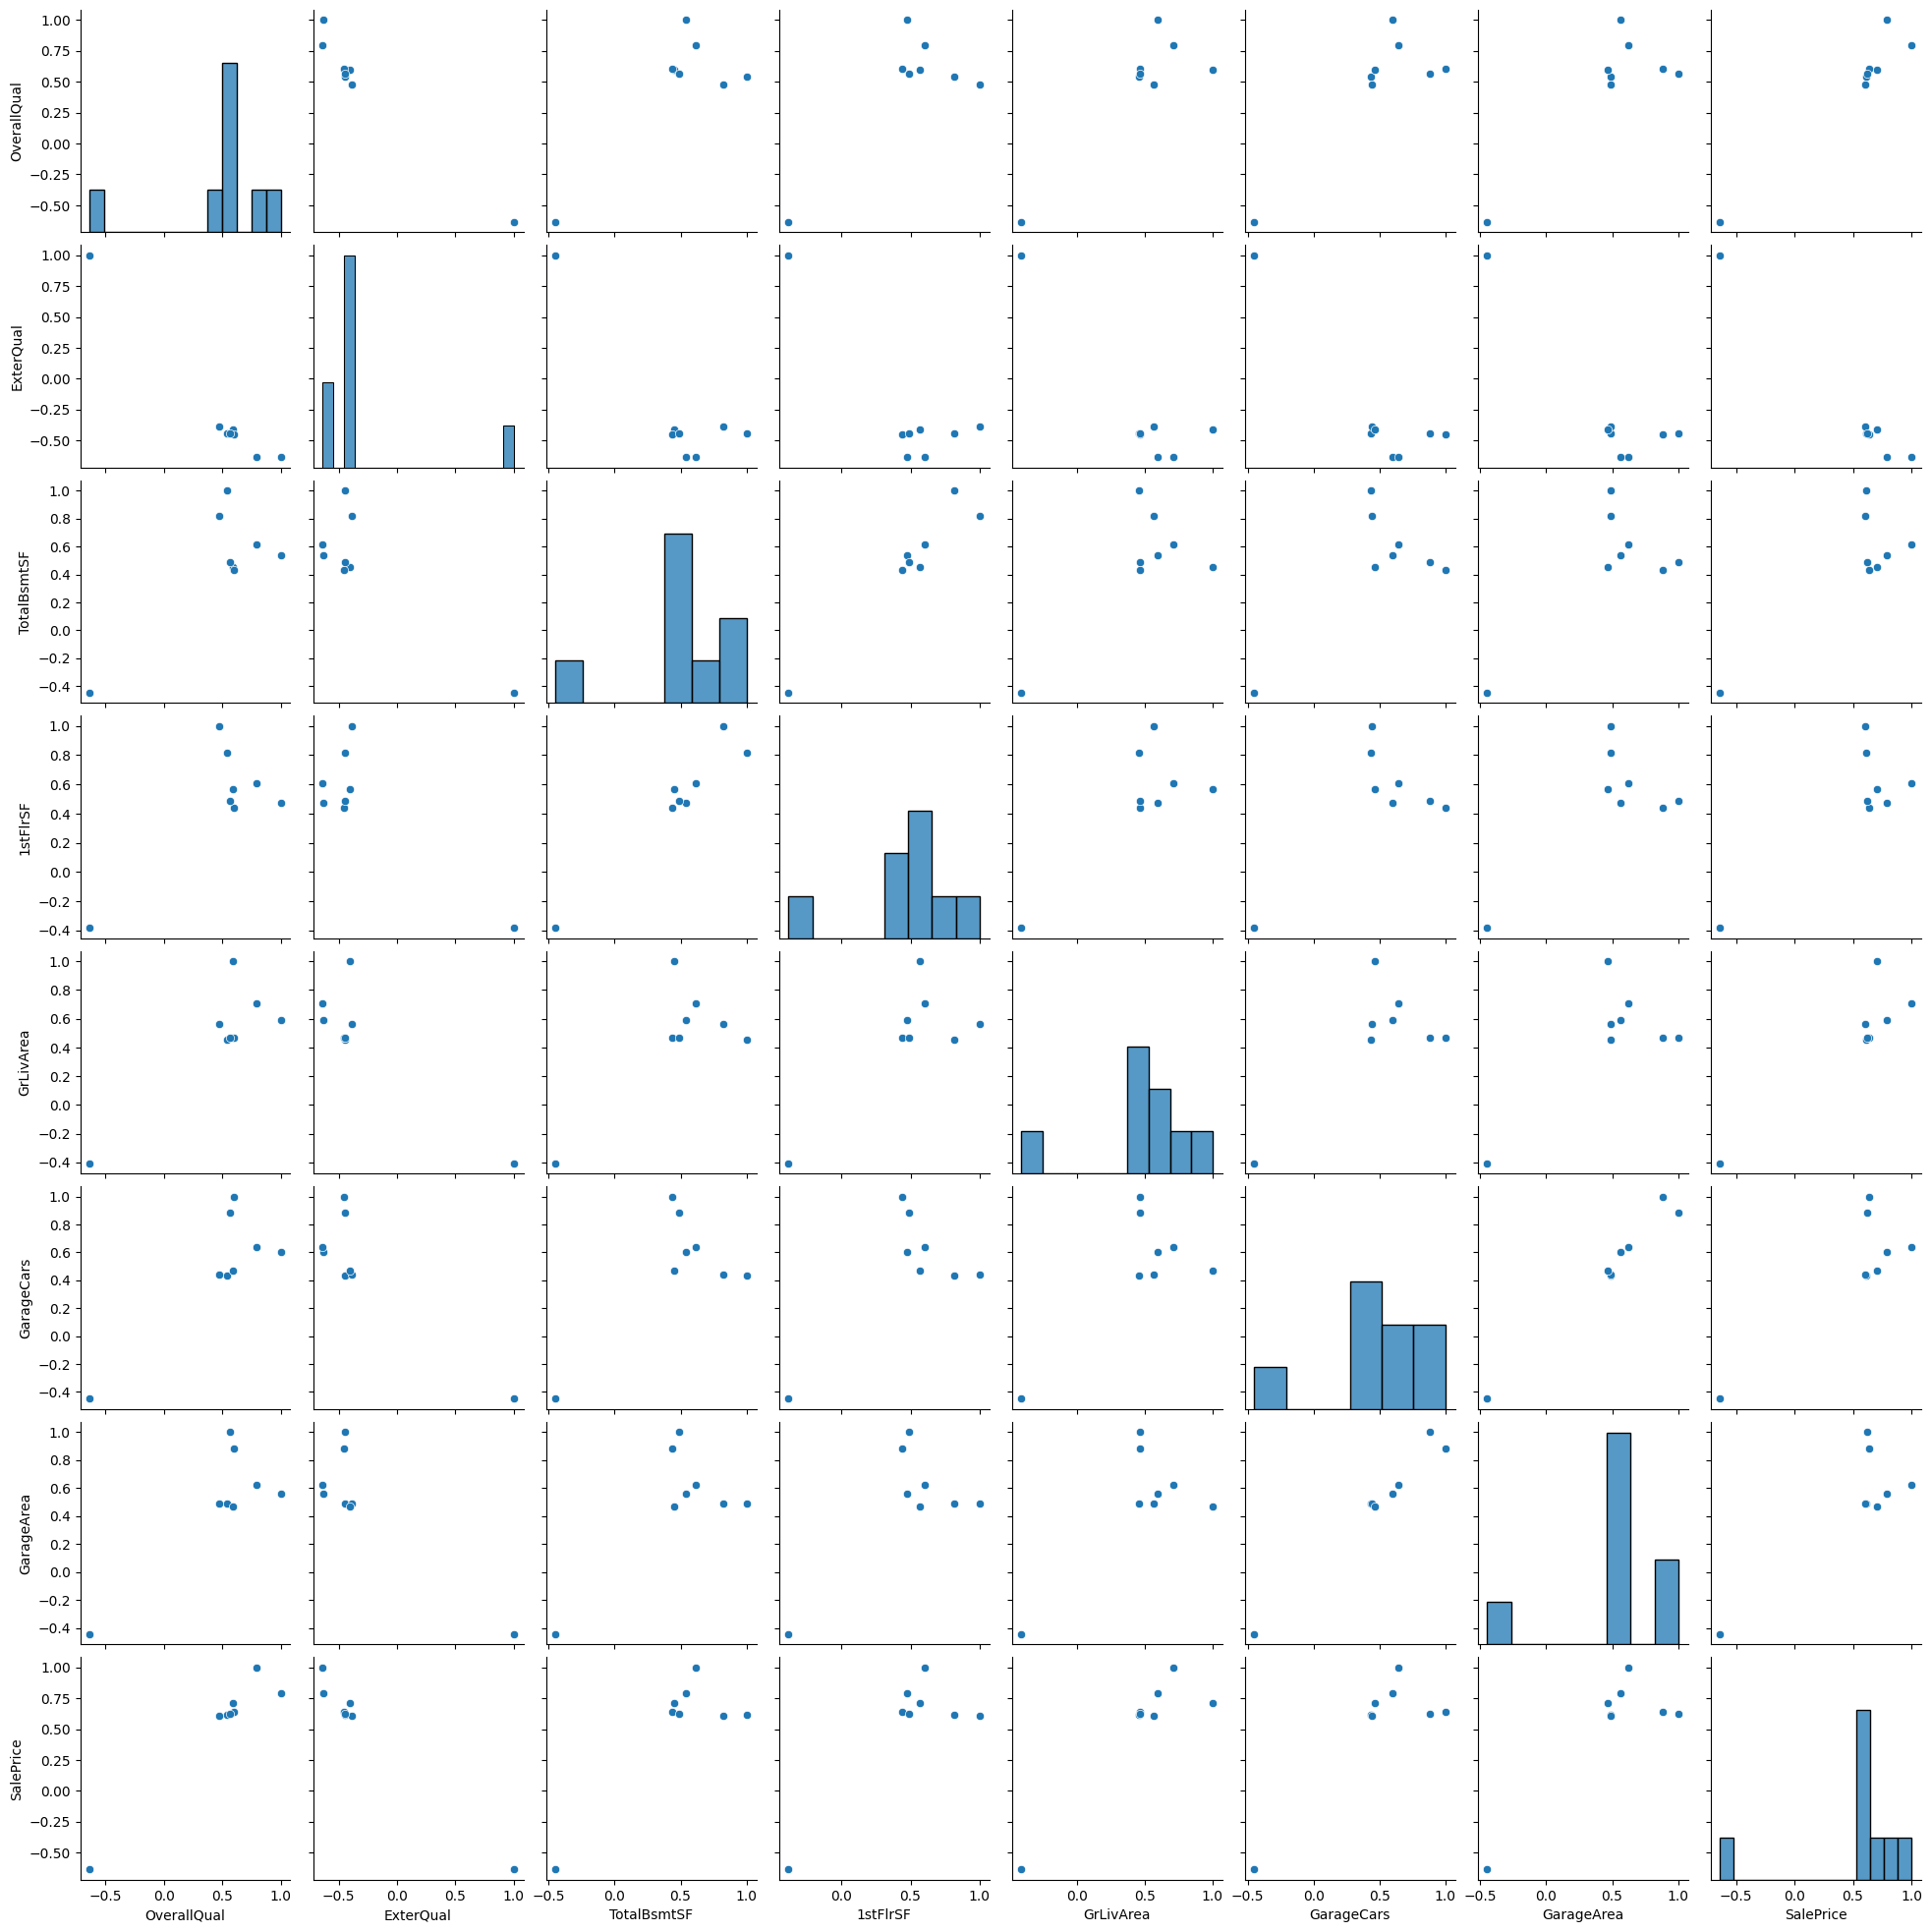

In [84]:
sns.pairplot(df.corr())
plt.show()

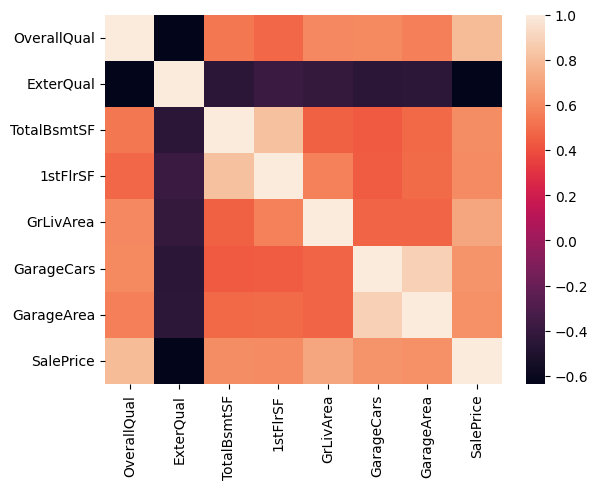

In [85]:
sns.heatmap(df.corr())
plt.show()

Inference: 
Among all the features, only the following 6 features have a very strong correlation with sale price
 - OverallQual
 - TotalBsmtSF
 - 1stFlrSF
 - GrLivArea
 - GarageCars
 - GarageArea


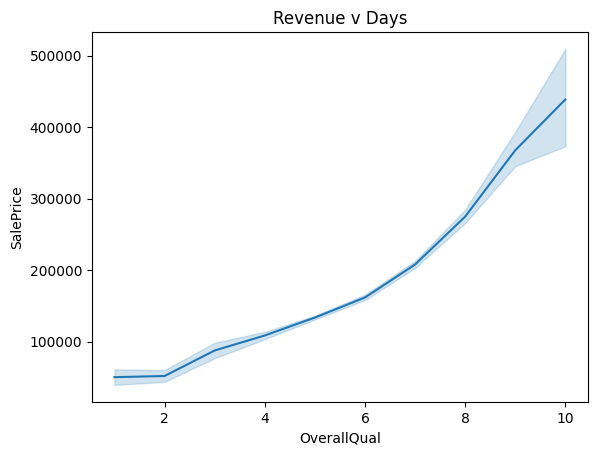

In [86]:
sns.lineplot(x=df['OverallQual'],y=df['SalePrice']).set(title='Revenue v Days')
plt.show()

Inference:
 - There is strong correlation between over all quality and sales price which means implies that a simple linear model can handle this data.

## 5. Model Building

### Linear Regression Model

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr_model = LinearRegression()
x = np.array(df['OverallQual'])
y = np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
lr_model.fit(X_train,y_train)


LinearRegression()

In [88]:
print('Performance:\nTrain',lr_model.score(X_train,y_train),'\nTest:',lr_model.score(X_test,y_test))

Performance:
Train 0.6180151629408257 
Test: 0.6352567933594282


As expected the simple linear model is able to fit the data

### Multiple linear regression

In [89]:
mlr_model = LinearRegression()
x = np.array(df.drop(['SalePrice'],axis=1))
y = np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = X_train


mlr_model.fit(X_train,y_train)

LinearRegression()

In [90]:
print('Performance:\nTrain',mlr_model.score(X_train,y_train),'\nTest:',mlr_model.score(X_test,y_test))

Performance:
Train 0.7579263442849767 
Test: 0.7981734297153326


We can see almost 10% jump in the performance while using a multiple linear regression

### Polynomial Regression

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=6
x = np.array(df['OverallQual'])
y = np.array(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [92]:
print('Performance:\nTrain',polyreg.score(X_train,y_train),'\nTest:',polyreg.score(X_test,y_test))

Performance:
Train 0.6713100913165551 
Test: 0.7191841770089649


We can see a better performance while using polynomial regression with degree 6

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [94]:
print('Performance:\nTrain',dt.score(X_train,y_train),'\nTest:',dt.score(X_test,y_test))

Performance:
Train 0.6692727067573438 
Test: 0.7160693244334747


Decision tree with max depth 3 has a great performance

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [78]:
print('Performance:\nTrain',forest.score(X_train,y_train),'\nTest:',forest.score(X_test,y_test))

Performance:
Train 0.6712637459788351 
Test: 0.7208600200949264


Out of every other model random forest performs best 

## 6. Results


| Model | Train | Test |
|---|---|---|---|---|
| Linear Regression | 61.80% | 63.52% |
| Multiple Linear Regression | 75.79% | 79.81% |
| Polynomial Regression | 67.13% |  71.91% |
| Decision Tree | 66.92% | 71.60% |
| Random Forest | 67.12 | 72.08% |
